In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import HeatMap, MarkerCluster
import scipy.stats as stats

In [3]:
df_properties = pd.read_excel('/content/drive/My Drive/IPRO/finaltrygood.xlsx')

# Preprocessing:

In [4]:
print("Property Data Overview:")
df_properties.info()

Property Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29709 entries, 0 to 29708
Data columns (total 62 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Date                                             29579 non-null  object 
 1   Address                                          29709 non-null  object 
 2   Draw1                                            27773 non-null  float64
 3   Draw2                                            27773 non-null  object 
 4   Draw3                                            27772 non-null  float64
 5   Max                                              29709 non-null  object 
 6   property_city                                    24790 non-null  object 
 7   property_zip                                     24790 non-null  object 
 8   longitude                                        24736 non-null  float64
 9   lati

In [5]:
df_properties.head()

,Date,Address,Draw1,Draw2,Draw3,Max,property_city,property_zip,longitude,latitude,...,Use,Multi-Family Indicator,"Condition, Desirability and Utility",Near Major Road,Location Factor,Garage indicator,Neigborhood Code (mapping),Town and Neighborhood,Private Service Line Material,Public Service Line Material
0,12/10/2020,97XX S MERRION AVE,390.0,8000,5800.0,"8,000.00",CHICAGO,60617-4846,-87.570148,41.717214,...,1.0,NaN,NaN,0.0,0.131580,0.0,180.0,70180.0,SUSPECTED LEAD,SUSPECTED LEAD
1,11/4/2020,63XX N HAMLIN AVE,6000.0,460,46.0,6000,CHICAGO,60659-1021,-87.723620,41.996733,...,1.0,NaN,NaN,0.0,1.061773,1.0,30.0,7130.0,SUSPECTED LEAD,SUSPECTED LEAD
2,11/21/2019,76XX S DAMEN AVE,4100.0,3.6,1.3,"4,100.00",CHICAGO,60620-5753,-87.672916,41.754665,...,1.0,NaN,NaN,0.0,0.514393,1.0,212.0,72212.0,SUSPECTED LEAD,SUSPECTED LEAD
3,3/18/2020,48XX N MERRIMAC AVE,4000.0,7.4,2.6,"4,000.00",CHICAGO,60630-2914,-87.784708,41.969542,...,1.0,NaN,NaN,0.0,1.236624,0.0,430.0,71430.0,NOT LEAD,SUSPECTED LEAD
4,10/11/2019,115XX S JUSTINE ST,1300.0,11,6.5,"1,300.00",CHICAGO,60643-5002,-87.659999,41.683341,...,1.0,NaN,NaN,0.0,0.446593,1.0,310.0,72310.0,SUSPECTED LEAD,SUSPECTED LEAD


In [6]:
# Clean column names
df_properties.columns = df_properties.columns.str.strip().str.replace(' ', '_')

In [7]:
# Drop rows with missing latitude/longitude
df_properties = df_properties.dropna(subset=['longitude', 'latitude'])

In [8]:
columns = df_properties.columns.tolist()  # Display all column names
columns

['Date',
 'Address',
 'Draw1',
 'Draw2',
 'Draw3',
 'Max',
 'property_city',
 'property_zip',
 'longitude',
 'latitude',
 'township',
 'township_name',
 'nbhd',
 'tract_geoid',
 'tract_pop',
 'tract_white_perc',
 'commissioner_dist',
 'reps_dist',
 'senate_dist',
 'ward',
 'school_elem_district',
 'PIN',
 'Property_Class',
 'Neighborhood_Code',
 'Land_Square_Feet',
 'Town_Code',
 'Type_of_Residence',
 'Apartments',
 'Wall_Material',
 'Roof_Material',
 'Rooms',
 'Bedrooms',
 'Basement',
 'Basement_Finish',
 'Construction_Quality',
 'Renovation',
 'Site_Desireability',
 'Garage_1_Size',
 'Garage_1_Material',
 'Porch',
 'Other_Improvements',
 'Building_Square_Feet',
 'Repair_Condition',
 'Multi_Code',
 'Number_of_Commercial_Units',
 'Prior_Tax_Year_Market_Value_Estimate_(Land)',
 'Prior_Tax_Year_Market_Value_Estimate_(Building)',
 'Longitude',
 'Latitude',
 'Total_Building_Square_Feet',
 'Multi_Property_Indicator',
 'Age',
 'Use',
 'Multi-Family_Indicator',
 'Condition,_Desirability_and_U

In [9]:
# Ensure property values are numeric
df_properties['Prior_Tax_Year_Market_Value_Estimate_(Building)'] = pd.to_numeric(
    df_properties['Prior_Tax_Year_Market_Value_Estimate_(Building)'], errors='coerce'
)

# Maps:

## 1. Data Normalization and Preprocessing

In [10]:
# Normalize property values for heatmap visualization
df_properties['normalized_value'] = df_properties[
    'Prior_Tax_Year_Market_Value_Estimate_(Building)'] / df_properties[
    'Prior_Tax_Year_Market_Value_Estimate_(Building)'].max()

# Separate lead service line properties
df_lead = df_properties[df_properties['Private_Service_Line_Material'].str.contains("LEAD", na=False)]

## 2. Geospatial Analysis - Heatmap Visualization

In [11]:
# Filter suspected lead service lines
df_lead = df_properties[df_properties['Private_Service_Line_Material'].str.contains("LEAD", na=False)]

In [12]:
# Heatmap of Lead Contamination Across Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Prepare heat map data (latitude, longitude)
heat_data = df_lead[['latitude', 'longitude']].dropna().values

# Add heatmap layer
HeatMap(heat_data, radius=10, blur=15).add_to(m)

# Show map
m

In [13]:
# Create base map centered on Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Heatmap for property values
heat_data = df_properties[['latitude', 'longitude', 'normalized_value']].dropna().values
HeatMap(heat_data, radius=10, blur=15, name='Property Value Heatmap').add_to(m)
# Cluster suspected lead service line locations
lead_cluster = MarkerCluster(name='Suspected Lead Lines').add_to(m)
for idx, row in df_lead_lines.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['Address']} - {row['Private_Service_Line_Material']}",
        icon=folium.Icon(color='red', icon='exclamation-triangle', prefix='fa')
    ).add_to(lead_cluster)

# Display map
m

Output hidden; open in https://colab.research.google.com to view.

## 3. Neighborhood and ZIP Code Analysis

In [14]:
# Aggregate suspected lead line counts by neighborhood
df_lead_count = df_lead_lines.groupby('nbhd').size().reset_index(name='lead_count')
df_lead_count = df_lead_count.sort_values(by='lead_count', ascending=False)
print("Top 5 Neighborhoods with Highest Lead Contamination:")
df_lead_count.head(5)

Top 5 Neighborhoods with Highest Lead Contamination:


,nbhd,lead_count
9,30.0,1319
53,150.0,975
25,70.0,965
2,12.0,779
46,120.0,720


<ipython-input-15-e5cfa319585d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette="Reds")


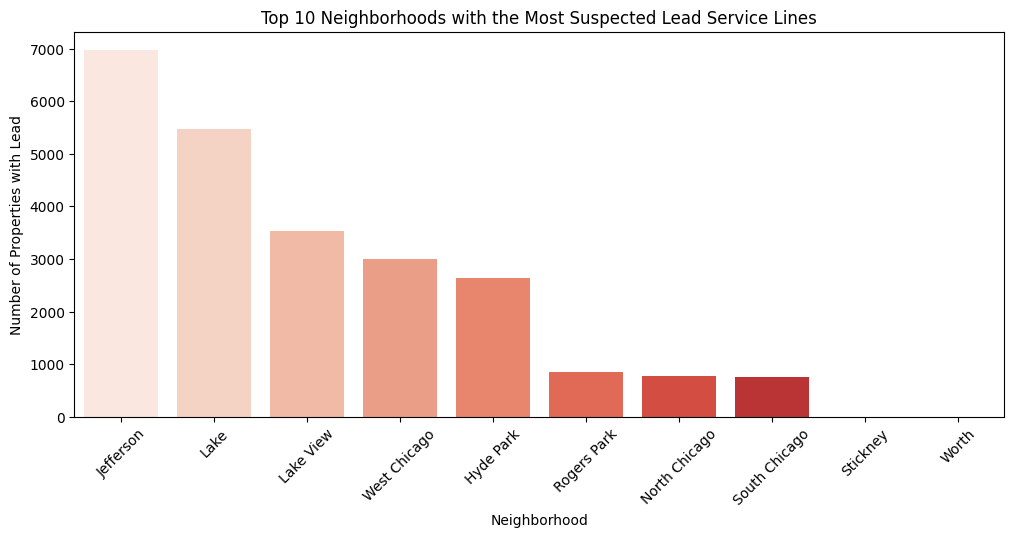

In [15]:
# Top 10 Neighborhoods with Most Lead Contamination
top_neighborhoods = df_lead['township_name'].value_counts().head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette="Reds")
plt.title("Top 10 Neighborhoods with the Most Suspected Lead Service Lines")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Properties with Lead")
plt.xticks(rotation=45)
plt.show()

<ipython-input-16-e6ce01d21a88>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_zip_codes.index, y=top_zip_codes.values, palette="Reds")


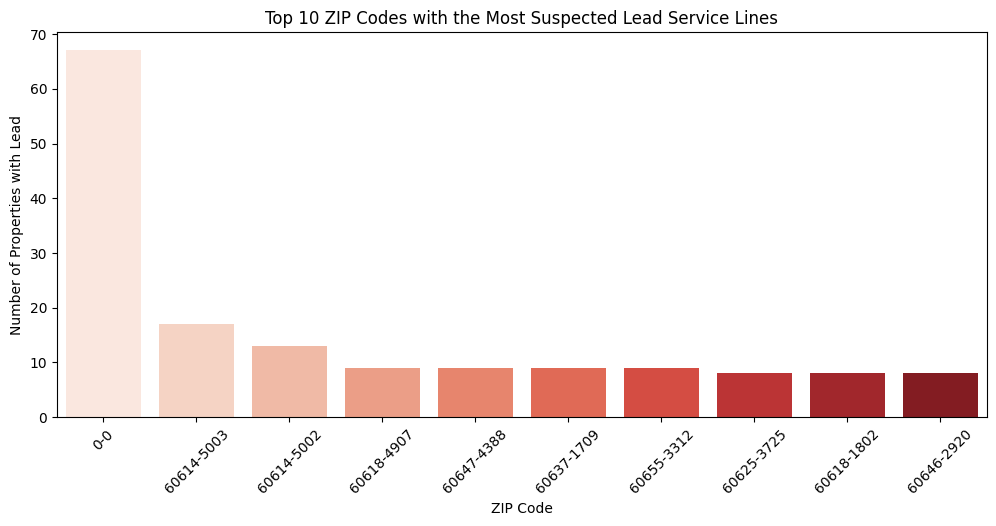

In [16]:
# Top 10 ZIP Codes with Most Lead Contamination
top_zip_codes = df_lead['property_zip'].value_counts().head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_zip_codes.index, y=top_zip_codes.values, palette="Reds")
plt.title("Top 10 ZIP Codes with the Most Suspected Lead Service Lines")
plt.xlabel("ZIP Code")
plt.ylabel("Number of Properties with Lead")
plt.xticks(rotation=45)
plt.show()

## 4. Lead Contamination Analysis by Property Characteristics

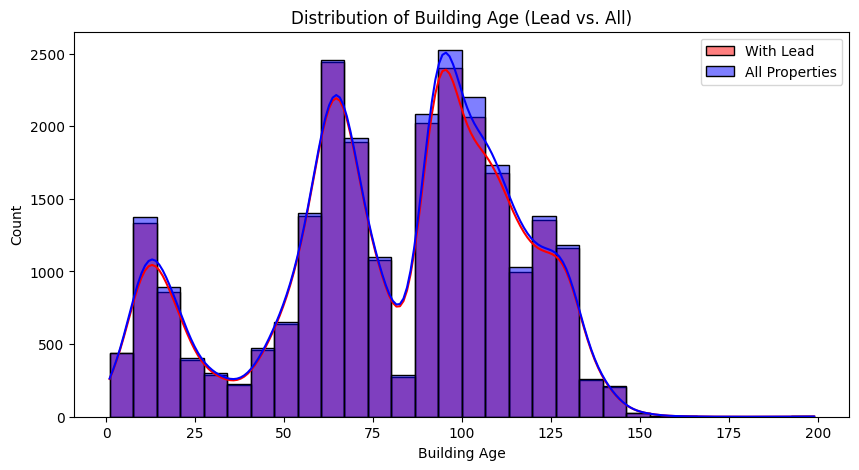

In [17]:
# Distribution of Building Age (Lead vs. All)
plt.figure(figsize=(10, 5))
sns.histplot(df_lead['Age'], bins=30, kde=True, color='red', label='With Lead')
sns.histplot(df_properties['Age'], bins=30, kde=True, color='blue', label='All Properties', alpha=0.5)
plt.title("Distribution of Building Age (Lead vs. All)")
plt.xlabel("Building Age")
plt.ylabel("Count")
plt.legend()
plt.show()

<ipython-input-18-b4a51218959b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_lead['Property_Class'], order=df_lead['Property_Class'].value_counts().index, palette="Reds")


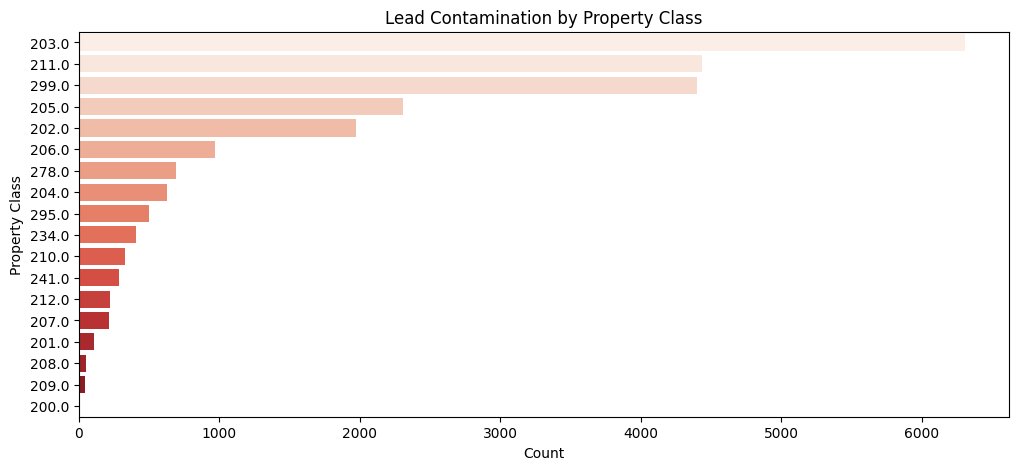

In [18]:
# Lead Contamination by Property Class
plt.figure(figsize=(12, 5))
sns.countplot(y=df_lead['Property_Class'], order=df_lead['Property_Class'].value_counts().index, palette="Reds")
plt.title("Lead Contamination by Property Class")
plt.xlabel("Count")
plt.ylabel("Property Class")
plt.show()

<ipython-input-19-2e8697c1c781>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_lead['Wall_Material'], order=df_lead['Wall_Material'].value_counts().index, palette="Reds")


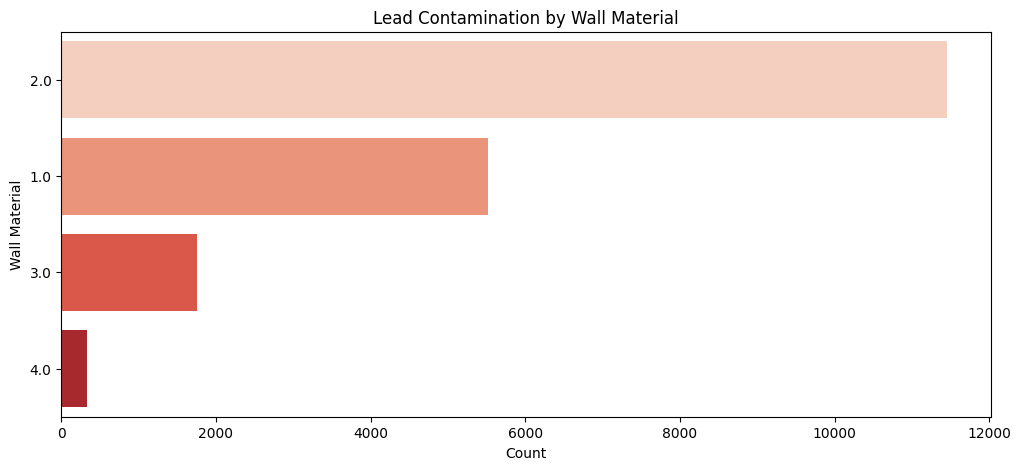

In [19]:
# Lead Contamination by Wall Material
plt.figure(figsize=(12, 5))
sns.countplot(y=df_lead['Wall_Material'], order=df_lead['Wall_Material'].value_counts().index, palette="Reds")
plt.title("Lead Contamination by Wall Material")
plt.xlabel("Count")
plt.ylabel("Wall Material")
plt.show()

<ipython-input-20-79aab463a38a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_lead['Roof_Material'], order=df_lead['Roof_Material'].value_counts().index, palette="Reds")


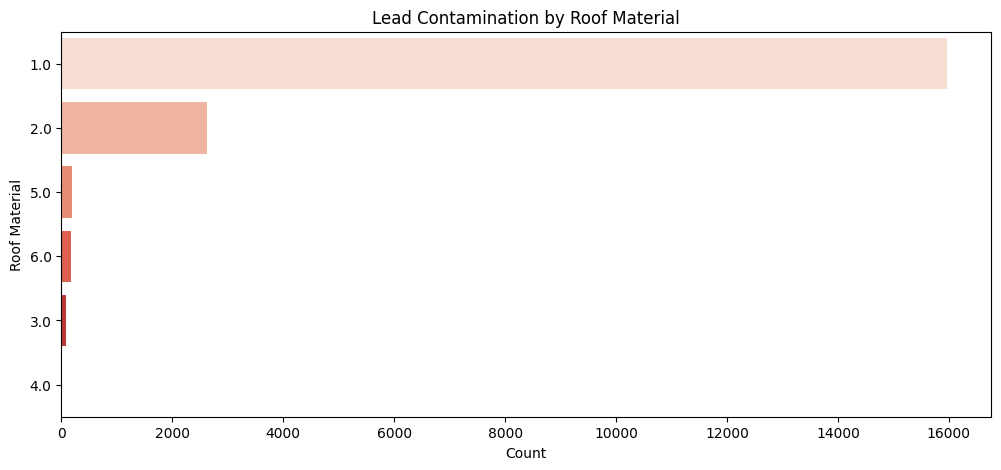

In [20]:
# Lead Contamination by Roof Material
plt.figure(figsize=(12, 5))
sns.countplot(y=df_lead['Roof_Material'], order=df_lead['Roof_Material'].value_counts().index, palette="Reds")
plt.title("Lead Contamination by Roof Material")
plt.xlabel("Count")
plt.ylabel("Roof Material")
plt.show()

<ipython-input-21-5b4beefae1d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_lead['Construction_Quality'], order=df_lead['Construction_Quality'].value_counts().index, palette="Reds")


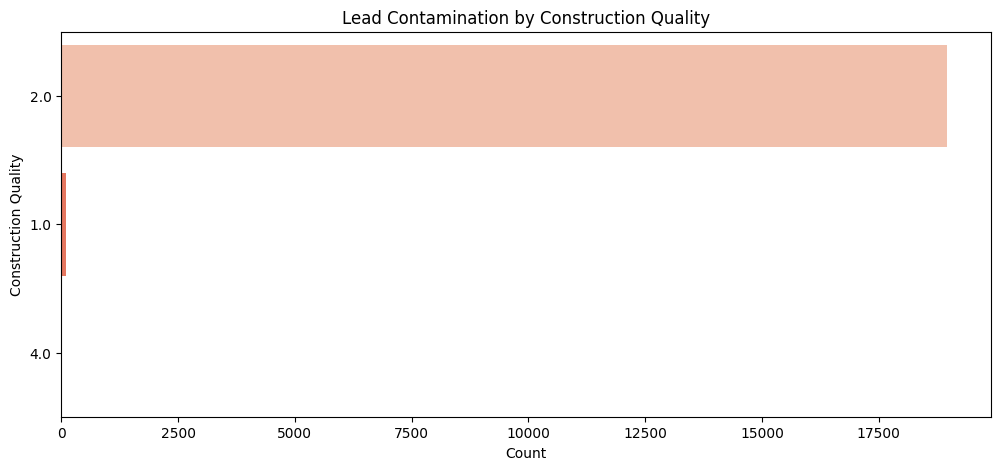

In [21]:
# Lead Contamination by Construction Quality
plt.figure(figsize=(12, 5))
sns.countplot(y=df_lead['Construction_Quality'], order=df_lead['Construction_Quality'].value_counts().index, palette="Reds")
plt.title("Lead Contamination by Construction Quality")
plt.xlabel("Count")
plt.ylabel("Construction Quality")
plt.show()

In [22]:
# Summary of suspected lead service line counts across categories
summary = {
    "Average Age of Properties w/ Lead": df_lead['Age'].mean(),
    "Most Common Property Class": df_lead['Property_Class'].mode()[0],
    "Most Common Wall Material": df_lead['Wall_Material'].mode()[0],
    "Most Common Roof Material": df_lead['Roof_Material'].mode()[0],
    "Most Common Construction Quality": df_lead['Construction_Quality'].mode()[0],
}

print("\nLead Contamination Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")


Lead Contamination Summary:
Average Age of Properties w/ Lead: 79.38206954335986
Most Common Property Class: 203.0
Most Common Wall Material: 2.0
Most Common Roof Material: 1.0
Most Common Construction Quality: 2.0


## 5. Random Statistical Analysis and Correlations

<ipython-input-23-2bac202450bd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_properties['Has_Lead'], y=df_properties[feature], palette=["blue", "red"])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


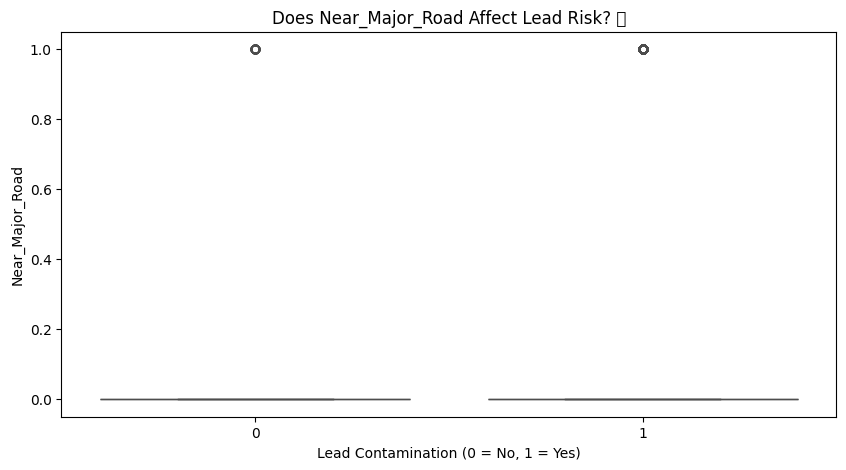

<ipython-input-23-2bac202450bd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_properties['Has_Lead'], y=df_properties[feature], palette=["blue", "red"])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


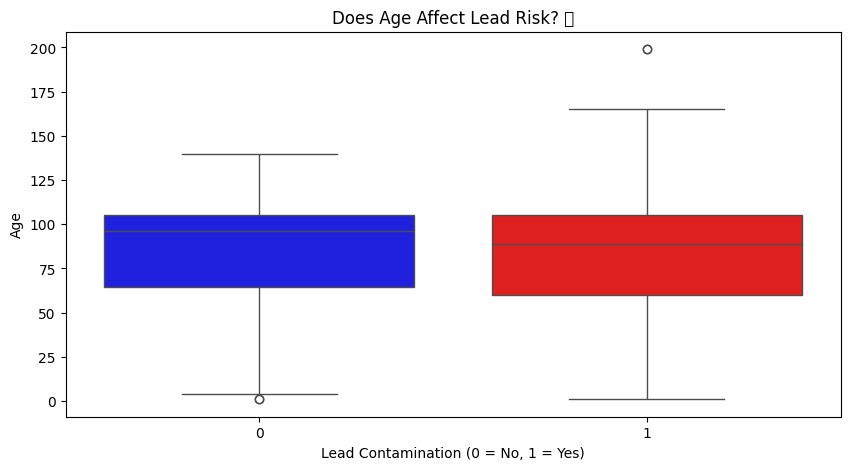

<ipython-input-23-2bac202450bd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_properties['Has_Lead'], y=df_properties[feature], palette=["blue", "red"])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


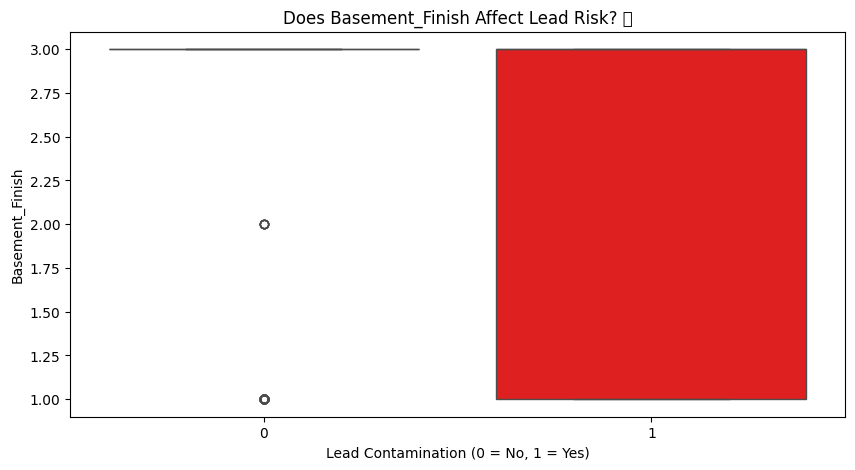

<ipython-input-23-2bac202450bd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_properties['Has_Lead'], y=df_properties[feature], palette=["blue", "red"])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


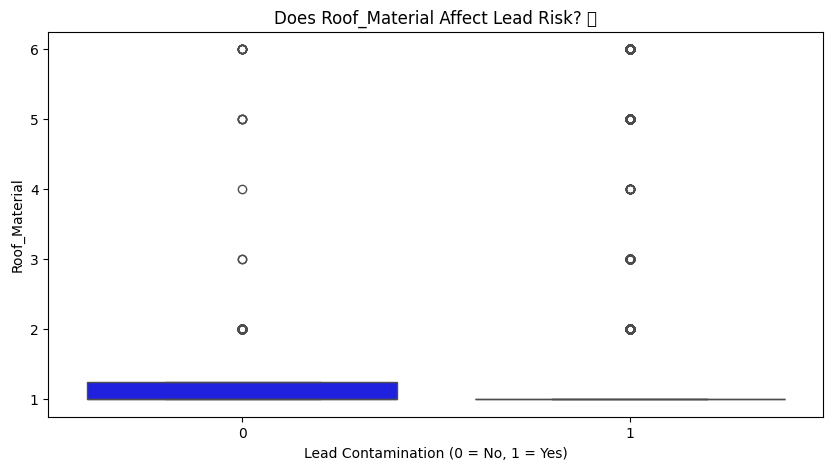

<ipython-input-23-2bac202450bd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_properties['Has_Lead'], y=df_properties[feature], palette=["blue", "red"])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


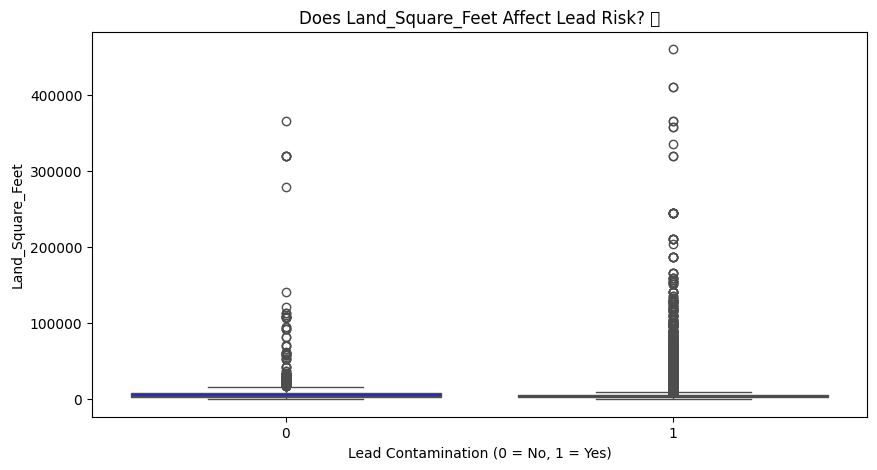

In [23]:
# Filter suspected lead service lines
df_properties['Has_Lead'] = df_properties['Private_Service_Line_Material'].str.contains("LEAD", na=False).astype(int)

# Choose some RANDOM features to analyze
random_features = [
    "Near_Major_Road", "Age", "Basement_Finish", "Roof_Material", "Land_Square_Feet"
]

# Create boxplots for each feature against lead presence
for feature in random_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_properties['Has_Lead'], y=df_properties[feature], palette=["blue", "red"])
    plt.title(f"Does {feature} Affect Lead Risk? 🤔")
    plt.xlabel("Lead Contamination (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.show()

In [24]:
# Compute correlation values
correlations = df_properties[random_features + ['Has_Lead']].corr()['Has_Lead'].sort_values()

print("\n🔍 Unexpected Correlations with Lead Presence:\n")
print(correlations)


🔍 Unexpected Correlations with Lead Presence:

Land_Square_Feet   -0.074911
Roof_Material      -0.026428
Basement_Finish    -0.018842
Age                -0.017290
Near_Major_Road    -0.017138
Has_Lead            1.000000
Name: Has_Lead, dtype: float64


In [25]:
# Find the *weirdest* statistical relationships
print("\n🤯 Weirdest Statistical Findings:")
for feature in random_features:
    stat, p = stats.ttest_ind(df_properties[df_properties['Has_Lead'] == 1][feature].dropna(),
                              df_properties[df_properties['Has_Lead'] == 0][feature].dropna(), equal_var=False)
    if p < 0.05:
        print(f"🚨 {feature} is SIGNIFICANTLY different between lead & non-lead properties! (p={p:.5f})")


🤯 Weirdest Statistical Findings:
🚨 Near_Major_Road is SIGNIFICANTLY different between lead & non-lead properties! (p=0.01915)
🚨 Age is SIGNIFICANTLY different between lead & non-lead properties! (p=0.00714)
🚨 Basement_Finish is SIGNIFICANTLY different between lead & non-lead properties! (p=0.00511)
🚨 Roof_Material is SIGNIFICANTLY different between lead & non-lead properties! (p=0.00293)
🚨 Land_Square_Feet is SIGNIFICANTLY different between lead & non-lead properties! (p=0.00000)


In [26]:
# Choose some RANDOM features to analyze
random_features = [
    "Near_Major_Road", "Age", "Basement_Finish", "Roof_Material", "Land_Square_Feet"
]


# Correlation with Lead Contamination
correlations = df_properties[random_features + ['Has_Lead']].corr()['Has_Lead'].sort_values()

print("\n🔍 Unexpected Correlations with Lead Presence:\n")
print(correlations)


🔍 Unexpected Correlations with Lead Presence:

Land_Square_Feet   -0.074911
Roof_Material      -0.026428
Basement_Finish    -0.018842
Age                -0.017290
Near_Major_Road    -0.017138
Has_Lead            1.000000
Name: Has_Lead, dtype: float64


## 6. DBSCAN Clustering for Lead Hotspots

In [27]:
from folium.plugins import MarkerCluster
from sklearn.cluster import DBSCAN

# DBSCAN Clustering for Lead Hotspots
coords = df_lead[['latitude', 'longitude']].values
db = DBSCAN(eps=0.01, min_samples=10).fit(coords)
df_lead['Cluster'] = db.labels_

# Plot clusters on a map
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Add cluster markers
marker_cluster = MarkerCluster().add_to(m)
for idx, row in df_lead.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster {row['Cluster']}",
        icon=folium.Icon(color="red" if row['Cluster'] != -1 else "blue")
    ).add_to(marker_cluster)

# Display map
m

Output hidden; open in https://colab.research.google.com to view.

## 7. Feature Analysis: Lead Contamination by Proximity to Major Roads

<ipython-input-28-99cd396b83e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lead['Near_Major_Road'] = pd.to_numeric(df_lead['Near_Major_Road'], errors='coerce')


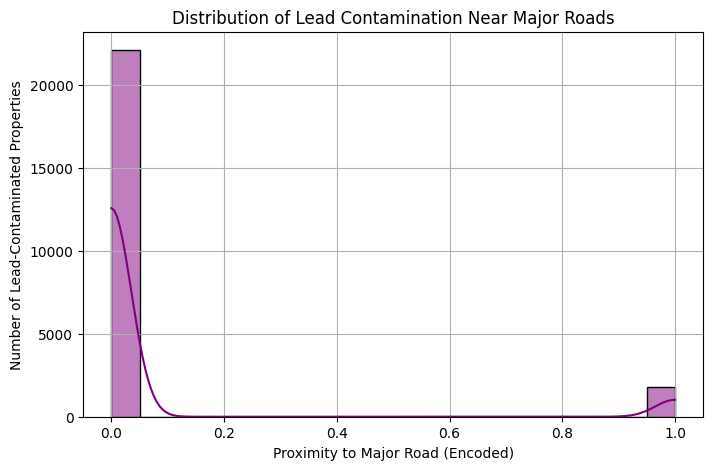

In [28]:
# Convert 'Near Major Road' to numeric
df_lead['Near_Major_Road'] = pd.to_numeric(df_lead['Near_Major_Road'], errors='coerce')

# **Plot distribution of lead contamination by road proximity**
plt.figure(figsize=(8, 5))
sns.histplot(df_lead['Near_Major_Road'], bins=20, kde=True, color='purple')
plt.xlabel("Proximity to Major Road (Encoded)")
plt.ylabel("Number of Lead-Contaminated Properties")
plt.title("Distribution of Lead Contamination Near Major Roads")
plt.grid()
plt.show()